In [1]:
# Import packages
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.sparse import csr_matrix
#
from contextlib import redirect_stdout


/opt/anaconda3/lib/python3.13/site-packages/pandas/core/computation/expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Set display option to show full content of columns
pd.options.display.max_colwidth = 50

# Show all the columns
pd.options.display.max_columns = None

# Turn off scientific notation for pandas DataFrames
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Take the dataframes
# file_reviews = '/content/drive/MyDrive/Recommendation Engine BP/Home_and_Kitchen_filtered.csv'
file_reviews = '../data/Home_and_Kitchen_filtered.csv'
df_reviews = pd.read_csv(file_reviews)

file_items = '../data/meta_Home_and_Kitchen_filtered.csv'
df_items = pd.read_csv(file_items)

/var/folders/86/_khp3pb10vg5vtbr6fmndrxc0000gn/T/ipykernel_66910/3046250483.py:4: DtypeWarning: Columns (0: vote) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv(file_reviews)


/var/folders/86/_khp3pb10vg5vtbr6fmndrxc0000gn/T/ipykernel_66910/3046250483.py:7: DtypeWarning: Columns (0: tech2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_items = pd.read_csv(file_items)


In [4]:
# Merge reviews with items using left_join
df_combined = df_reviews.merge(df_items, left_on='asin', right_on='asin', how = 'left')

# Convert 'unixReviewTime' to datetime format
df_combined['unixReviewTime'] = pd.to_datetime(df_combined['unixReviewTime'], unit='s')

In [5]:
df_combined.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,summary,unixReviewTime,vote,style,image,category,tech1,description,title,tech2,brand,feature,rank,main_cat,price,date
0,5.00,True,"11 5, 2015",A8LUWTIPU9CZB,0560467893,Linda Fahner,Five Stars,2015-11-05,NaN,NaN,NaN,"['Home & Kitchen', 'Home Dcor', 'Home Dcor Acc...",NaN,['Chicago Floating Shelf is an impressively se...,"WELLAND Chicago Wall Floating Corner Shelf, 20...",NaN,WELLAND,['Dimensions: 20-inch W by 20-inch D by 1.75-i...,"['>#1,037,069 in Home & Kitchen (See Top 100 i...",Amazon Home,NaN,NaN
1,3.00,True,"05 7, 2015",A3B6GKQQ1JJ167,0560467893,Harry Slaughter,Meh,2015-05-07,2,NaN,NaN,"['Home & Kitchen', 'Home Dcor', 'Home Dcor Acc...",NaN,['Chicago Floating Shelf is an impressively se...,"WELLAND Chicago Wall Floating Corner Shelf, 20...",NaN,WELLAND,['Dimensions: 20-inch W by 20-inch D by 1.75-i...,"['>#1,037,069 in Home & Kitchen (See Top 100 i...",Amazon Home,NaN,NaN
2,5.00,True,"01 22, 2014",A3MCTN65BU7XRA,0681795107,luckyg,Recommend,2014-01-22,NaN,{'Color:': ' Brushed Stainless'},NaN,"['Home & Kitchen', 'Kitchen & Dining', 'Travel...",NaN,['Signature Travel Mug is double wall insulate...,Stainless Coffee Mug,NaN,Timolino,"['18/8 stainless steel inside and out', 'Doubl...","['>#220,715 in Kitchen & Dining (See Top 100 i...",Amazon Home,$14.27,"August 1, 2006"
3,1.00,True,"10 30, 2013",A7JVZFSXVY9RL,0681795107,Nickleen,Not keeping coffee hot for long enough,2013-10-30,NaN,{'Color:': ' Brushed Stainless'},NaN,"['Home & Kitchen', 'Kitchen & Dining', 'Travel...",NaN,['Signature Travel Mug is double wall insulate...,Stainless Coffee Mug,NaN,Timolino,"['18/8 stainless steel inside and out', 'Doubl...","['>#220,715 in Kitchen & Dining (See Top 100 i...",Amazon Home,$14.27,"August 1, 2006"
4,1.00,True,"09 20, 2013",A2RQ7VLAK1SHPU,0681795107,Lacemaker427,Leaks like a waterfall when at an angle!,2013-09-20,NaN,{'Color:': ' Red'},NaN,"['Home & Kitchen', 'Kitchen & Dining', 'Travel...",NaN,['Signature Travel Mug is double wall insulate...,Stainless Coffee Mug,NaN,Timolino,"['18/8 stainless steel inside and out', 'Doubl...","['>#220,715 in Kitchen & Dining (See Top 100 i...",Amazon Home,$14.27,"August 1, 2006"


## Check **"Date"** Variable

In [6]:
df_earliest_review = (
    df_combined.groupby('asin')
    .agg(earliest_review_date=('unixReviewTime', 'min'), date=('date', 'first'))
    .reset_index()
)
df_earliest_review

,asin,earliest_review_date,date
0,0560467893,2015-05-07,NaN
1,0681795107,2010-11-26,"August 1, 2006"
2,0768205921,2012-02-15,NaN
3,0805469613,2011-05-16,"October 31, 2006"
4,0983124248,2013-01-27,NaN
...,...,...,...
189167,B01HJCREGO,2016-09-01,NaN
189168,B01HJEJDBQ,2016-08-08,NaN
189169,B01HJEKGHQ,2016-11-07,NaN
189170,B01HJEOT2E,2016-11-11,"June 25, 2016"


In [7]:
# Percentage of products with missing date
pct_missing = df_earliest_review['date'].isna().mean() * 100
print(f"Percentage of products with missing date: {pct_missing:.2f}%")

# Compare date with earliest_review_date
df_earliest_review['date_parsed'] = pd.to_datetime(df_earliest_review['date'], format='mixed', errors='coerce')
df_earliest_review['date_before_review'] = (df_earliest_review['date_parsed'] <= df_earliest_review['earliest_review_date']).astype(int)
df_earliest_review[['asin', 'earliest_review_date', 'date', 'date_before_review']]

Percentage of products with missing date: 51.50%


,asin,earliest_review_date,date,date_before_review
0,0560467893,2015-05-07,NaN,0
1,0681795107,2010-11-26,"August 1, 2006",1
2,0768205921,2012-02-15,NaN,0
3,0805469613,2011-05-16,"October 31, 2006",1
4,0983124248,2013-01-27,NaN,0
...,...,...,...,...
189167,B01HJCREGO,2016-09-01,NaN,0
189168,B01HJEJDBQ,2016-08-08,NaN,0
189169,B01HJEKGHQ,2016-11-07,NaN,0
189170,B01HJEOT2E,2016-11-11,"June 25, 2016",1


## **Item Features**

**Variables to consider:** <br> category: divided into 6 variables (can be used) <br> title <br> brand (needs discussion) <br> price (can be used) <br> description <br> feature <br> style: comes from reviews (needs discussion) <br> main_cat (Mostly "Amazon Home", cannot be used) <br> rank <br> date (can be used) <br> image <br> tech1/tech2

**category**: consists of several levels of descriptions (example below). We after checking the number of items with different number of categories, we found that 98.8% of items have <= 6 categories. We will create 6 columns for the categories naming cat_1 ... cat_6.

In [8]:
df_items['category'].iloc[2]


"['Home & Kitchen', 'Kitchen & Dining', 'Dining & Entertaining', 'Glassware & Drinkware', 'Wine & Champagne Glasses']"

In [9]:
import ast

# Parse category strings into lists and count levels per product
category_levels = (
   df_items.dropna(subset=['category'])['category']
   .apply(lambda x: len(ast.literal_eval(x)))
)

print("Category level distribution:")
print(category_levels.value_counts().sort_index())

Category level distribution:
category
2      42061
3     215222
4     541603
5     367255
6     118939
7       8201
8       1146
9       1757
10      2019
11      1806
12       406
13       110
14        12
16         3
Name: count, dtype: int64


In [10]:
# Create variables from the 6 categories
cat_lists = df_items['category'].dropna().apply(ast.literal_eval)
for i in range(6):
    df_items[f'cat_{i+1}'] = cat_lists.apply(lambda x: x[i] if len(x) > i else None)

In [11]:
df_items[['asin', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6']]

,asin,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6
0,0001487795,Home & Kitchen,Kitchen & Dining,Dining & Entertaining,Dinnerware,Plates,Dinner Plates
1,0002020300,Home & Kitchen,Home Dcor,Candles & Holders,Candles,NaN,NaN
2,0006564224,Home & Kitchen,Kitchen & Dining,Dining & Entertaining,Glassware & Drinkware,Wine & Champagne Glasses,NaN
3,0009046461,Home & Kitchen,Bath,Bathroom Accessories,NaN,NaN,NaN
4,0234937912,Home & Kitchen,Home Dcor,Home Fragrance,Incense & Incense Holders,Incense,NaN
...,...,...,...,...,...,...,...
1300535,B01HJHTC6O,Home & Kitchen,Kitchen & Dining,Small Appliance Parts & Accessories,NaN,NaN,NaN
1300536,B01HJH0J4S,Home & Kitchen,Kitchen & Dining,Small Appliances,NaN,NaN,NaN
1300537,B01HJGJNWS,Home & Kitchen,Kitchen & Dining,Cookware,Roasting Pans,NaN,NaN
1300538,B01HJHOITU,Home & Kitchen,Home Dcor,Artificial Plants & Flowers,Artificial Flowers,NaN,NaN


**brand**

In [12]:
df_items['brand'].head(10)

0        Waechtersbach USA
1                    Vicks
2      Artistic Churchware
3                   Mysore
4                Patanjali
5    Get Motivated Posters
6                    Cello
7               Scholastic
8           My Little Pony
9                 Pfeiffer
Name: brand, dtype: str

**brand:** seller information

In [13]:
# Clean brand: lowercase and remove special characters and spaces
df_items['brand_clean'] = (
    df_items['brand']
    .str.lower()
    .str.replace(r'[^a-z0-9]', '', regex=True)
)
df_items[['asin', 'brand', 'brand_clean']].head(10)

,asin,brand,brand_clean
0,0001487795,Waechtersbach USA,waechtersbachusa
1,0002020300,Vicks,vicks
2,0006564224,Artistic Churchware,artisticchurchware
3,0009046461,Mysore,mysore
4,0234937912,Patanjali,patanjali
5,0250459655,Get Motivated Posters,getmotivatedposters
6,0326591516,Cello,cello
7,0439903491,Scholastic,scholastic
8,0456680012,My Little Pony,mylittlepony
9,0470902884,Pfeiffer,pfeiffer


**main_cat:** mostly Amazon Home. Some other values are also available but cannot be used for feature extractions

In [14]:
df_items['main_cat'].value_counts()

main_cat
Amazon Home                                                                                                                                                                 1157623
Tools & Home Improvement                                                                                                                                                      21504
Toys & Games                                                                                                                                                                  16441
Health & Personal Care                                                                                                                                                        12554
<img src="https://images-na.ssl-images-amazon.com/images/G/01/nav2/images/gui/amazon-fashion-store-new._CB520838675_.png" class="nav-categ-image" alt="AMAZON FASHION"/>      12405
Arts, Crafts & Sewing                                                                      

**Extracting features from text: color**

In [15]:
# Define common colors for Home & Kitchen products
colors = [
    # Basic Colors
    'white', 'black', 'red', 'blue', 'green', 'yellow', 'orange', 'purple',
    'pink', 'brown', 'gray', 'grey', 'silver', 'gold', 'beige', 'ivory',
    'cream', 'navy', 'teal', 'turquoise', 'bronze', 'copper', 'chrome',
    'clear', 'transparent', 'multicolor', 'multi-color',

    # Metals & Hardware
    'stainless steel', 'brushed nickel', 'oil rubbed bronze', 'matte black',
    'satin nickel', 'polished chrome', 'antique brass', 'gunmetal', 'pewter',
    'iron', 'anodized aluminum', 'burnished copper', 'rose gold',

    # Wood Tones
    'walnut', 'oak', 'mahogany', 'espresso', 'teak', 'birch', 'pine', 'ash',
    'cherry', 'maple', 'wenge', 'acorn', 'driftwood', 'whitewash', 'natural oak',

    # Earth & Jewel Tones
    'terracotta', 'sage', 'olive', 'emerald', 'forest green', 'indigo',
    'charcoal', 'slate', 'taupe', 'ochre', 'cognac', 'rust', 'sand', 'khaki',
    'mushroom', 'champagne', 'blush', 'dusty rose', 'charcoal', 'anthracite'
]
# Combine title and feature into one text field for searching
df_items['text_combined'] = (
    df_items['title'].fillna('') + ' ' + df_items['feature'].fillna('')
).str.lower()

# Extract first matching color from text
color_pattern = '|'.join(sorted(colors, key=len, reverse=True))  # longest match first

df_items['color'] = df_items['text_combined'].str.extract(f'({color_pattern})', expand=False)

print(f"Color extracted for {df_items['color'].notna().sum()} / {len(df_items)} products ({df_items['color'].notna().mean()*100:.1f}%)")
print(f"\nTop 15 colors:")
print(df_items['color'].value_counts().head(15))

Color extracted for 879359 / 1300540 products (67.6%)

Top 15 colors:
color
red                140339
ash                120332
black               78655
white               72190
stainless steel     50382
blue                46108
green               29222
clear               25685
silver              22350
gold                21984
brown               21164
pink                20018
iron                18214
rust                15232
purple              11208
Name: count, dtype: int64


In [16]:
df_items['color'].value_counts()

color
red                 140339
ash                 120332
black                78655
white                72190
stainless steel      50382
                     ...  
anthracite              80
dusty rose              60
natural oak             57
burnished copper        20
ochre                   17
Name: count, Length: 74, dtype: int64

**feature**

In [17]:
df_items['feature'].head(20)

0                                                    []
1                                                    []
2     ['Religious Supply Center', 'RW-525', 'Communi...
3                                                    []
4                                                    []
5                                                    []
6              ['Set of 15 Blue, Red & Black Ball Pen']
7     ['Software: Play I SPY games to uncover the hi...
8     ['100% official merchandise', 'Features Rainbo...
9                                                    []
10    ['Size: Big bag 8.7"L x 5.7"H x 5.8"W Zipper C...
11    ['Dimensions: 20-inch W by 20-inch D by 1.75-i...
12    ['Shipped UPS', 'Heavy Paper', 'There is a bor...
13    ['Barnes & Noble Exclusive', '100% cotton', 'F...
14    ['Delicious seafood appetizers and entrees fro...
15    ['The State Flag Magnet is ideal for posting n...
16    ['Decorate your walls with this 11" x 17" Demo...
17    ['12 oz Mauve Coffee Mug', 'Symbols "ILU" 

In [18]:
# Word count for title, description, and feature
df_items['title_word_count'] = df_items['title'].fillna('').str.split().str.len()
df_items['description_word_count'] = df_items['description'].fillna('').str.split().str.len()
df_items['feature_word_count'] = df_items['feature'].fillna('').str.split().str.len()

df_items[['asin', 'title_word_count', 'description_word_count', 'feature_word_count']].describe()

,title_word_count,description_word_count,feature_word_count
count,1300540.00,1300540.00,1300540.00
mean,11.46,69.02,43.24
std,5.97,79.02,54.10
min,0.00,1.00,1.00
25%,7.00,19.00,12.00
50%,10.00,48.00,29.00
75%,14.00,93.00,53.00
max,332.00,10066.00,1281.00


In [19]:
df_items[['asin', 'title', 'title_word_count', 'description_word_count', 'feature_word_count']].sort_values('title_word_count', ascending=False).head(20)

,asin,title,title_word_count,description_word_count,feature_word_count
692531,B00I7ZHQ6Q,Catholic Rose Scented Wood Rosary Rose Scented...,332,1,1
869667,B00P5TQ3UW,Cars &amp; Vehicles - Pearl White Colored Indi...,202,305,67
825121,B00N8FYTXS,Almond Colored Indispensible&trade; an Ergonom...,197,304,67
816395,B00MX3P3QI,Amish Handcrafted Solid Pine Bread Box and 3 D...,196,196,10
646535,B00GGQEGLQ,Amish Handcrafted Solid Pine Bread Box and 3 D...,170,170,1
619794,B00FFHUHS8,Pink Realxgear Xtreme Cooling Towel - Large Gr...,170,1,1
646539,B00GGQFU4S,Amish Handcrafted Solid Pine Bread Box and 2 D...,168,168,1
461224,B00A4V0RB2,Amish Handcrafted Solid Pine Bread Box and 3 D...,168,168,1
262815,B004Q6CWFK,Mens Rosary or Boys Rosary. Paloa Carola Catho...,159,1,1
822255,B00N4AUXQ4,2xhome - TV Stand with Shelves - Tempered Glas...,150,105,90


In [20]:
print(f"Unique ASINs in df_items: {df_items['asin'].nunique()}")
print(f"Total rows in df_items: {len(df_items)}")

Unique ASINs in df_items: 1285392
Total rows in df_items: 1300540


In [21]:
titles_combined = ' '.join(df_items['title'].dropna().tolist())
print(f"Total characters: {len(titles_combined)}")
print(f"Total words: {len(titles_combined.split())}")

Total characters: 97635444


Total words: 14905835


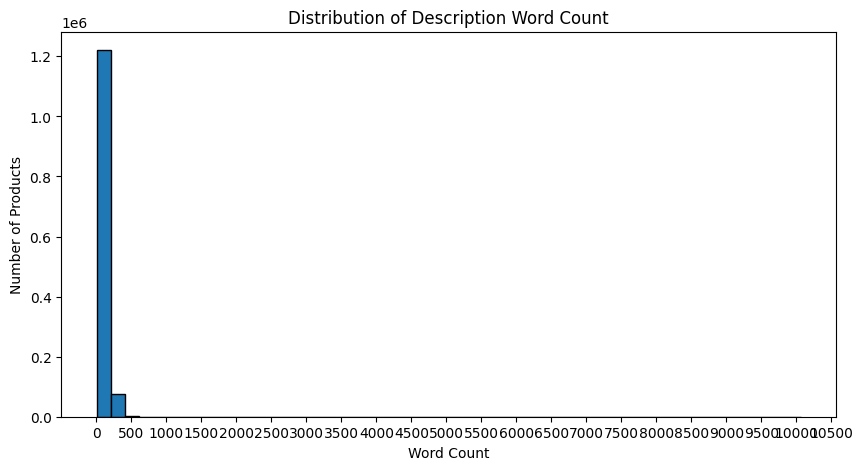

In [22]:
plt.figure(figsize=(10, 5))
plt.hist(df_items['description_word_count'], bins=50, edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Number of Products')
plt.title('Distribution of Description Word Count')
plt.xticks(range(0, int(df_items['description_word_count'].max()) + 500, 500))
plt.show()

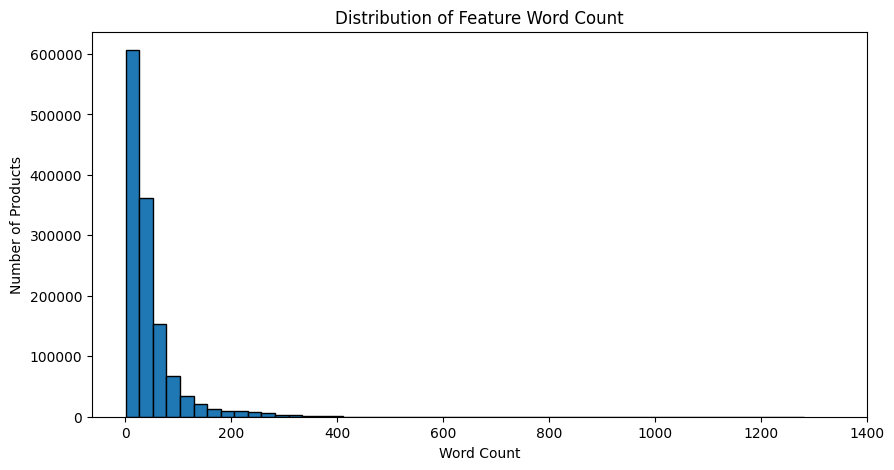

In [23]:
plt.figure(figsize=(10, 5))
plt.hist(df_items['feature_word_count'], bins=50, edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Number of Products')
plt.title('Distribution of Feature Word Count')
plt.xticks(range(0, int(df_items['feature_word_count'].max()) + 200, 200))
plt.show()

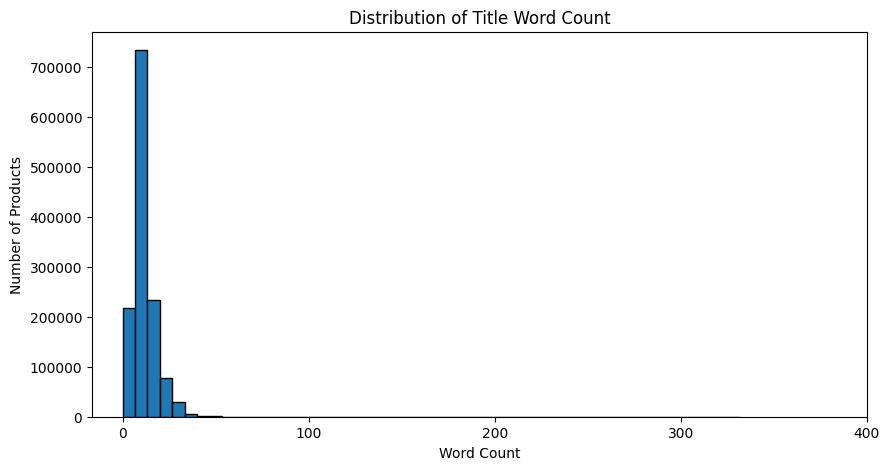

In [24]:
plt.figure(figsize=(10, 5))
plt.hist(df_items['title_word_count'], bins=50, edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Number of Products')
plt.title('Distribution of Title Word Count')
plt.xticks(range(0, int(df_items['title_word_count'].max()) + 100, 100))
plt.show()

In [25]:
df_items[['asin', 'title_word_count', 'description_word_count', 'feature_word_count']]

,asin,title_word_count,description_word_count,feature_word_count
0,0001487795,9,33,1
1,0002020300,9,17,1
2,0006564224,6,6,7
3,0009046461,8,98,1
4,0234937912,6,32,1
...,...,...,...,...
1300535,B01HJHTC6O,5,16,16
1300536,B01HJH0J4S,4,16,16
1300537,B01HJGJNWS,10,46,35
1300538,B01HJHOITU,12,45,23


**Categories**

In [26]:
df_items[df_items['cat_2'] == 'Furniture']['cat_3'].value_counts()
# df_items['cat_2'].value_counts()

cat_3
Living Room Furniture                                                                                                                                                     19962
Bedroom Furniture                                                                                                                                                         13220
Game & Recreation Room Furniture                                                                                                                                           8512
Kitchen & Dining Room Furniture                                                                                                                                            7708
Home Office Furniture                                                                                                                                                      7578
Kids' Furniture                                                                                                   

In [27]:
# For each cat_4 under 'Dining & Entertaining', show cat_5 and cat_6 values with count > 1
dining = df_items[df_items['cat_3'] == 'Dining & Entertaining']

for cat4_val in sorted(dining['cat_4'].dropna().unique()):
    subset = dining[dining['cat_4'] == cat4_val]
    print(f"\n{'='*60}")
    print(f"cat_4: {cat4_val}")
    print(f"{'='*60}")

    # cat_5 values with count > 1
    cat5_counts = subset['cat_5'].value_counts()
    cat5_filtered = cat5_counts[cat5_counts > 1]
    if not cat5_filtered.empty:
        print(f"\n  cat_5 (count > 1):")
        for val, cnt in cat5_filtered.items():
            print(f"    {val}: {cnt}")

    # cat_6 values with count > 1
    cat6_counts = subset['cat_6'].value_counts()
    cat6_filtered = cat6_counts[cat6_counts > 1]
    if not cat6_filtered.empty:
        print(f"\n  cat_6 (count > 1):")
        for val, cnt in cat6_filtered.items():
            print(f"    {val}: {cnt}")


cat_4: Bar Tools & Drinkware

  cat_5 (count > 1):
    Bar Tools: 15607

  cat_6 (count > 1):
    Coasters: 8655
    Flasks: 2580
    Decanters: 910
    Cocktail Napkins: 858
    Glass Markers: 598
    Cocktail Picks: 577
    Swizzle Sticks: 270
    Rimming Salts & Sugars: 80
    Ice Crushers: 77
    Seltzer Bottles & Chargers: 57

cat_4: Dinnerware

  cat_5 (count > 1):
    Cups, Mugs, & Saucers: 19514
    Plates: 7573
    Bowls: 5994
    Dinnerware Sets: 3408

  cat_6 (count > 1):
    Coffee Cups & Mugs: 15743
    Accent Plates: 2457
    Bowl Sets: 2340
    Dinner Plates: 2288
    Cup & Saucer Sets: 1144
    Mug Sets: 1034
    Soup Bowls: 963
    Specialty Plates: 789
    Salad Plates: 753
    Teacups: 714
    Cereal Bowls: 622
    Salad Bowls: 431
    Dessert Bowls: 357
    Pasta Bowls: 315
    Charger & Service Plates: 284
    Dessert Plates: 228
    Rice Bowls: 207
    Bread & Butter Plates: 169
    Espresso Cups: 140
    Snack Bowls: 128
    Saucers: 126
    Appetizer Plates: 11